In [1]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
mxnet 1.8.0.post0 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.17 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from supervised.automl import AutoML
import numpy as np

In [3]:
df = pd.read_csv("../input/real-quad-fields-1-2/real_quad_fields_1_2.csv")

In [15]:
print(df.class_number.value_counts()[:2])

2    183432
1    177159
Name: class_number, dtype: int64


In [6]:
#df = df.sample(1000)

Columns are:
*  'defining_polynomial'
*  'class_number'
*  'discriminant'
*  'res_s=0'
*  'number_roots_unity'
*  'regulator'
*  'a_1', 'a_2', 'a_3', ..., 'a_1000'

In [4]:
primes_up_to_1000 = [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
list_primes_and_powers = [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
first_terms = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

for i in primes_up_to_1000[1:8]:
    for j in first_terms :
        if (i**j) <= 1000:
            list_primes_and_powers.append(i**j)          
list_primes_and_powers.sort()

#col_train = np.r_[6:1006]
#col_train = [i + 5 for i in list_primes_and_powers]
col_train = [i + 5 for i in primes_up_to_1000]
predict_col = 1
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df.iloc[:, predict_col])

y_train = df_train.iloc[:, predict_col]
y_test = df_test.iloc[:, predict_col]

# matrix of explanatory variables includes
X_train = df_train.iloc[:, col_train]
X_test = df_test.iloc[:, col_train]

See mljar documentation [Steps of AutoML](https://supervised.mljar.com/features/automl/)

AutoML directory: AutoML_3
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Xgboost', 'LightGBM']
AutoML steps: ['simple_algorithms', 'default_algorithms']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 2 models
1_Default_LightGBM logloss 0.137365 trained in 4343.65 seconds
AutoML fit time: 4350.27 seconds
AutoML best model: 1_Default_LightGBM


AutoML(algorithms=['Xgboost', 'LightGBM'], explain_level=1,
       golden_features=False, stack_models=False, train_ensemble=False,
       validation_strategy={'k_folds': 4, 'shuffle': False, 'stratify': True,
                            'validation_type': 'kfold'})

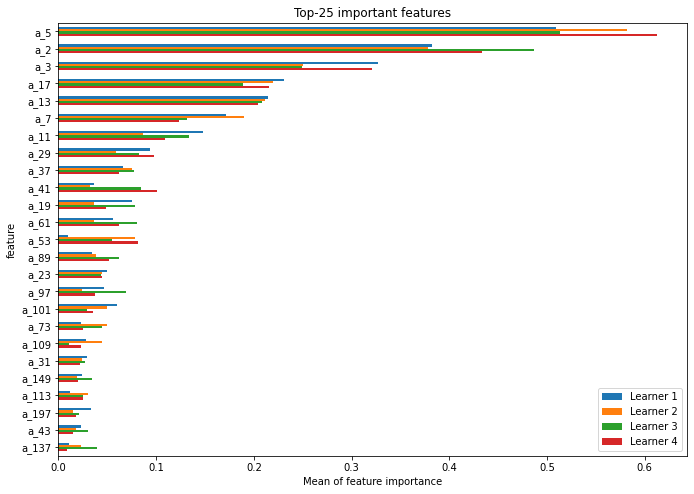

In [5]:
automl = AutoML(
    algorithms=["Xgboost", "LightGBM", "Neural Network", "Nearest Neighbors", "CatBoost"],
    mode="Explain",
    explain_level = 1,
    golden_features=False,
    stack_models=False,
    train_ensemble=False,
    validation_strategy={
        "validation_type": "kfold",
        "k_folds": 4,
        "shuffle": False,
        "stratify": True,
    })

automl.fit(X_train, y_train)

In [6]:
automl.report()

In [7]:
# compute the accuracy on test data
y_pred = automl.predict_all(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred['label'].astype(int)))

Test accuracy: 0.9611011481077484
